In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

In [3]:
# Access the database from AWS
# Query each tabel
# Create DataFrame for each tabel 
import pandas as pd
from sqlalchemy import create_engine
# Set up database connection parameters
db_url = "database-project-4.coiydcjowrsi.us-west-2.rds.amazonaws.com"
db_port = 5432
db_name = "database_project4"
db_user = "........."
db_password = ".........."
# Create a database connection
engine = create_engine(f"postgresql://{db_user}:{db_password}@{db_url}:{db_port}/{db_name}")
# Query the database using Pandas
query_price = "SELECT * FROM price"
query_room = "SELECT * FROM room"
query_locations = "SELECT * FROM locations"
price_df = pd.read_sql_query(query_price, engine)
room_df = pd.read_sql_query(query_room, engine)
locations_df = pd.read_sql_query(query_locations, engine)
# Close the database connection
engine.dispose()

In [25]:
# Check price tabel
price_df.head(5)

,zipcode,p_2015,p_2016,p_2017,p_2018,p_2019,p_2020,p_2021,p_2022,p_2023,net_income
0,75001,273859.58,295281.26,319308.56,332937.39,333861.35,339818.07,378728.24,440760.63,454387.59,31081.0
1,75002,239753.96,264265.55,284191.72,296218.09,296925.02,305948.22,360917.02,456706.81,464720.11,97936.0
2,75006,166228.03,190571.63,211957.41,230517.64,237664.55,247785.26,278907.45,332128.56,341701.77,115491.0
3,75007,202984.63,229672.38,252570.85,270069.18,275111.24,285478.08,325031.65,389614.50,400732.13,100570.0
4,75009,280691.57,310914.56,336086.42,346691.19,347364.97,354443.47,428784.45,567323.67,557517.04,16893.0


In [24]:
# Check room table tabel
room_df.head(5)

,zipcode,bedroom_number,bathroom_number,lining_space,land_space,year_built
0,75001,2.0,3.0,1981.0,1873.0,2003.0
1,75002,4.0,3.0,3044.0,3827.0,1976.0
2,75006,3.0,2.0,1938.0,5075.0,2001.0
3,75007,3.0,2.0,2049.0,6753.0,1915.0
4,75009,4.0,4.0,3153.0,5374.0,2000.0


In [23]:
# Check locations tabel
locations_df.head(5)

,zipcode,latitude,longitude,state,population
0,75001,32.96,-96.84,TX,16287.0
1,75002,33.09,-96.61,TX,71102.0
2,75006,32.96,-96.90,TX,48104.0
3,75007,33.00,-96.90,TX,54448.0
4,75009,33.34,-96.75,TX,24737.0


In [22]:
# Merge lacations table and room tabel
locations_room = locations_df.merge(room_df, how='left', on='zipcode')
locations_room.head(5)

,zipcode,latitude,longitude,state,population,bedroom_number,bathroom_number,lining_space,land_space,year_built
0,75001,32.96,-96.84,TX,16287.0,2.0,3.0,1981.0,1873.0,2003.0
1,75002,33.09,-96.61,TX,71102.0,4.0,3.0,3044.0,3827.0,1976.0
2,75006,32.96,-96.90,TX,48104.0,3.0,2.0,1938.0,5075.0,2001.0
3,75007,33.00,-96.90,TX,54448.0,3.0,2.0,2049.0,6753.0,1915.0
4,75009,33.34,-96.75,TX,24737.0,4.0,4.0,3153.0,5374.0,2000.0


In [21]:
# Merge all dataframe to create our final tabel
TX_Housing_data = locations_room.merge(price_df, how='left', on='zipcode')
TX_Housing_data.head(5)

,zipcode,latitude,longitude,state,population,bedroom_number,bathroom_number,lining_space,land_space,year_built,p_2015,p_2016,p_2017,p_2018,p_2019,p_2020,p_2021,p_2022,p_2023,net_income
0,75001,32.96,-96.84,TX,16287.0,2.0,3.0,1981.0,1873.0,2003.0,273859.58,295281.26,319308.56,332937.39,333861.35,339818.07,378728.24,440760.63,454387.59,31081.0
1,75002,33.09,-96.61,TX,71102.0,4.0,3.0,3044.0,3827.0,1976.0,239753.96,264265.55,284191.72,296218.09,296925.02,305948.22,360917.02,456706.81,464720.11,97936.0
2,75006,32.96,-96.90,TX,48104.0,3.0,2.0,1938.0,5075.0,2001.0,166228.03,190571.63,211957.41,230517.64,237664.55,247785.26,278907.45,332128.56,341701.77,115491.0
3,75007,33.00,-96.90,TX,54448.0,3.0,2.0,2049.0,6753.0,1915.0,202984.63,229672.38,252570.85,270069.18,275111.24,285478.08,325031.65,389614.50,400732.13,100570.0
4,75009,33.34,-96.75,TX,24737.0,4.0,4.0,3153.0,5374.0,2000.0,280691.57,310914.56,336086.42,346691.19,347364.97,354443.47,428784.45,567323.67,557517.04,16893.0


In [19]:
TX_Housing_data = TX_Housing_data.dropna()

In [26]:
TX_Housing_data.head(5)

,zipcode,latitude,longitude,state,population,bedroom_number,bathroom_number,lining_space,land_space,year_built,p_2015,p_2016,p_2017,p_2018,p_2019,p_2020,p_2021,p_2022,p_2023,net_income
0,75001,32.96,-96.84,TX,16287.0,2.0,3.0,1981.0,1873.0,2003.0,273859.58,295281.26,319308.56,332937.39,333861.35,339818.07,378728.24,440760.63,454387.59,31081.0
1,75002,33.09,-96.61,TX,71102.0,4.0,3.0,3044.0,3827.0,1976.0,239753.96,264265.55,284191.72,296218.09,296925.02,305948.22,360917.02,456706.81,464720.11,97936.0
2,75006,32.96,-96.90,TX,48104.0,3.0,2.0,1938.0,5075.0,2001.0,166228.03,190571.63,211957.41,230517.64,237664.55,247785.26,278907.45,332128.56,341701.77,115491.0
3,75007,33.00,-96.90,TX,54448.0,3.0,2.0,2049.0,6753.0,1915.0,202984.63,229672.38,252570.85,270069.18,275111.24,285478.08,325031.65,389614.50,400732.13,100570.0
4,75009,33.34,-96.75,TX,24737.0,4.0,4.0,3153.0,5374.0,2000.0,280691.57,310914.56,336086.42,346691.19,347364.97,354443.47,428784.45,567323.67,557517.04,16893.0


# Random Forest Train

In [76]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
#https://www.statology.org/valueerror-unknown-label-type-continuous/
from sklearn import preprocessing
from sklearn import utils

In [77]:
TX_Housing_data.columns

Index(['zipcode', 'population', 'bedroom_number', 'bathroom_number',
       'lining_space', 'land_space', 'year_built', 'p_2015', 'p_2016',
       'p_2017', 'p_2018', 'p_2019', 'p_2020', 'p_2021', 'p_2022', 'p_2023',
       'net_income', 'p_2024'],
      dtype='object')

In [78]:
#focusing on the non float values 
TX_Housing_data = TX_Housing_data[["zipcode", 'population',
       'bedroom_number', 'bathroom_number', 'lining_space', 'land_space',
       'year_built', 'p_2015', 'p_2016', 'p_2017', 'p_2018', 'p_2019',
       'p_2020', 'p_2021', 'p_2022', 'p_2023', 'net_income' ]]

TX_Housing_data.head()

,zipcode,population,bedroom_number,bathroom_number,lining_space,land_space,year_built,p_2015,p_2016,p_2017,p_2018,p_2019,p_2020,p_2021,p_2022,p_2023,net_income
0,75001,16287.0,2.0,3.0,1981.0,1873.0,2003.0,273859.58,295281.26,319308.56,332937.39,333861.35,339818.07,378728.24,440760.63,454387.59,31081.0
1,75002,71102.0,4.0,3.0,3044.0,3827.0,1976.0,239753.96,264265.55,284191.72,296218.09,296925.02,305948.22,360917.02,456706.81,464720.11,97936.0
2,75006,48104.0,3.0,2.0,1938.0,5075.0,2001.0,166228.03,190571.63,211957.41,230517.64,237664.55,247785.26,278907.45,332128.56,341701.77,115491.0
3,75007,54448.0,3.0,2.0,2049.0,6753.0,1915.0,202984.63,229672.38,252570.85,270069.18,275111.24,285478.08,325031.65,389614.50,400732.13,100570.0
4,75009,24737.0,4.0,4.0,3153.0,5374.0,2000.0,280691.57,310914.56,336086.42,346691.19,347364.97,354443.47,428784.45,567323.67,557517.04,16893.0


### Step 2: Split the data into X and y variables

In [79]:
# Separate the data into labels and features

# Create a y variable and use the P_2023 column as the label
y = TX_Housing_data["p_2023"].ravel()


# Create an X variable and use all other columns as features
X = TX_Housing_data.drop(columns='p_2023')

In [80]:
# Review the y variable series
y[:]

array([454387.59, 464720.11, 341701.77, ..., 217041.27, 199986.1 ,
       238718.81])

In [81]:
# Review the X variable DataFrame
X.head(5)

,zipcode,population,bedroom_number,bathroom_number,lining_space,land_space,year_built,p_2015,p_2016,p_2017,p_2018,p_2019,p_2020,p_2021,p_2022,net_income
0,75001,16287.0,2.0,3.0,1981.0,1873.0,2003.0,273859.58,295281.26,319308.56,332937.39,333861.35,339818.07,378728.24,440760.63,31081.0
1,75002,71102.0,4.0,3.0,3044.0,3827.0,1976.0,239753.96,264265.55,284191.72,296218.09,296925.02,305948.22,360917.02,456706.81,97936.0
2,75006,48104.0,3.0,2.0,1938.0,5075.0,2001.0,166228.03,190571.63,211957.41,230517.64,237664.55,247785.26,278907.45,332128.56,115491.0
3,75007,54448.0,3.0,2.0,2049.0,6753.0,1915.0,202984.63,229672.38,252570.85,270069.18,275111.24,285478.08,325031.65,389614.50,100570.0
4,75009,24737.0,4.0,4.0,3153.0,5374.0,2000.0,280691.57,310914.56,336086.42,346691.19,347364.97,354443.47,428784.45,567323.67,16893.0


In [82]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
print(X_train.shape)
print(X_test.shape)

(931, 16)
(233, 16)


In [84]:
scaler = StandardScaler()

In [85]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [86]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [87]:
#https://www.statology.org/valueerror-unknown-label-type-continuous/
lab = preprocessing.LabelEncoder()
y_transformed_train = lab.fit_transform(y_train)
y_transformed_test= lab.fit_transform(y_test)

In [88]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=5)

In [89]:
# Fitting the model
rf_model.fit(X_train_scaled, y_transformed_train)

RandomForestClassifier(random_state=5)

In [90]:
#predicting the values 
predictions = rf_model.predict(X_test_scaled)

In [92]:
#adding the y_predictions colummn  
TX_Housing_data.loc[X_test.index, 'p_2024'] = predictions
TX_Housing_data.head(5)

,zipcode,population,bedroom_number,bathroom_number,lining_space,land_space,year_built,p_2015,p_2016,p_2017,p_2018,p_2019,p_2020,p_2021,p_2022,p_2023,net_income,p_2024
0,75001,16287.0,2.0,3.0,1981.0,1873.0,2003.0,273859.58,295281.26,319308.56,332937.39,333861.35,339818.07,378728.24,440760.63,454387.59,31081.0,NaN
1,75002,71102.0,4.0,3.0,3044.0,3827.0,1976.0,239753.96,264265.55,284191.72,296218.09,296925.02,305948.22,360917.02,456706.81,464720.11,97936.0,NaN
2,75006,48104.0,3.0,2.0,1938.0,5075.0,2001.0,166228.03,190571.63,211957.41,230517.64,237664.55,247785.26,278907.45,332128.56,341701.77,115491.0,NaN
3,75007,54448.0,3.0,2.0,2049.0,6753.0,1915.0,202984.63,229672.38,252570.85,270069.18,275111.24,285478.08,325031.65,389614.50,400732.13,100570.0,NaN
4,75009,24737.0,4.0,4.0,3153.0,5374.0,2000.0,280691.57,310914.56,336086.42,346691.19,347364.97,354443.47,428784.45,567323.67,557517.04,16893.0,NaN


In [93]:
#doing the accuary and r^2 values
mse = mean_squared_error(y_transformed_test, predictions)
acc_score = accuracy_score(y_transformed_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f"Accuracy Score : {acc_score}")

Mean Squared Error: 150231.05579399143
Accuracy Score : 0.0


In [94]:
print(classification_report(y_transformed_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       1.0
          17       0.00    

C:\Users\Fatima\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fatima\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fatima\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fatima\anaconda3\envs\de

In [95]:
#find the most important features
importances = rf_model.feature_importances_
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.08097181063611725, 'zipcode'),
 (0.078438605546013, 'land_space'),
 (0.07730201580002873, 'lining_space'),
 (0.07728725651356205, 'net_income'),
 (0.07620762772832997, 'population'),
 (0.07105717721184225, 'year_built'),
 (0.06840265240694855, 'p_2015'),
 (0.06652157081835111, 'p_2022'),
 (0.06451917421779532, 'p_2016'),
 (0.06159577752692422, 'p_2021'),
 (0.061443523372545, 'p_2020'),
 (0.060919948052604464, 'p_2017'),
 (0.058844655705116926, 'p_2018'),
 (0.058512385679228236, 'p_2019'),
 (0.01908986811666773, 'bathroom_number'),
 (0.018885950667925238, 'bedroom_number')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

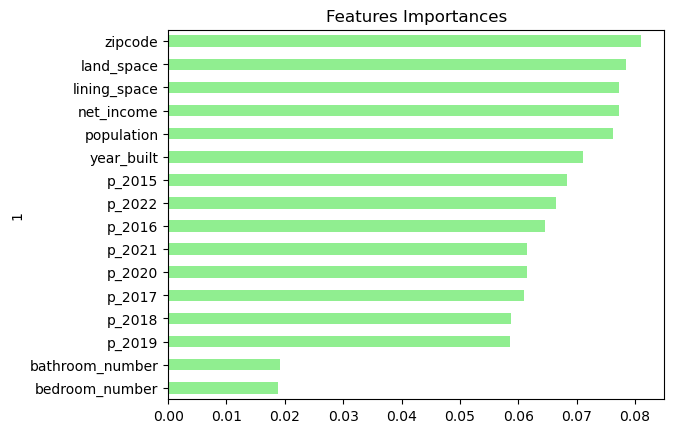

In [96]:
#visual of it
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

# Conclusion

In summary, the feature importance analysis highlights the significance of various factors in influencing the model's predictions. 'Zipcode' emerges as the most crucial feature, followed closely by 'land_space,' 'living_space,' and 'net_income.' These findings underscore the importance of location, available land and living space, and economic factors in determining the target variable.

'Population' also holds notable importance, emphasizing the impact of demographic considerations on the model's outputs. Additionally, features related to the year of construction ('year_built') and various year-specific indicators ('p_2015' through 'p_2022') contribute significantly to the model's decision-making process.

On the other hand, 'bathroom_number' and 'bedroom_number' have relatively lower importance in comparison to other features, suggesting a lesser impact on the model's predictions.

Understanding the hierarchy of feature importance can guide further investigations, data collection efforts, or model refinements, providing valuable insights for optimizing the model's performance in practical applications.





